In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import SpectralClustering

### t-SNE Visualisation

In [27]:
json_file_path = 'amino_acid_to_embedding.json'

with open(json_file_path, 'r') as json_file:
    # Load the JSON data from the file
    aa_embeddings = json.load(json_file)

aa_embeddings.keys()

dict_keys(['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', '<OTHER>', '<START>', '<END>', '<PAD>'])

In [28]:
token_to_aminoacid = {'A': 'Alanine', 'R': 'Arginine', 'N': 'Asparagine', 'D': 'Aspartic Acid',
                      'C': 'Cysteine', 'E': 'Glutamic Acid', 'Q': 'Glutamine', 'G': 'Glycine', 
                      'H': 'Histidine', 'I': 'Isoleucine', 'L': 'Leucine', 'K': 'Lysine', 'M': 'Methionine',
                      'F': 'Phenylalanine', 'P': 'Proline', 'S': 'Serine', 'T': 'Threonine', 
                      'W': 'Tryptophan', 'Y': 'Tyrosine', 'V': 'Valine', 
                      'U': 'Selenocysteine', 'O': 'Pyrrolysine',
                      'X': 'Undefined Aminoacid', '<OTHER>': '<OTHER>',
                      '<START>' : '<START>', '<END>': '<END>', '<PAD>': '<PAD>'}


In [37]:
prottrans_aas = sorted(['A','G','S','T','P','D','E','Q','N','H','R','K','M','L','I','V','W','Y','F','X','C'])

In [62]:
# Source https://www.imgt.org/IMGTeducation/Aide-memoire/_UK/aminoacids/abbreviation.html 
aa_masses = {
    'A': 89,
    'R': 174,
    'N': 132,
    'D': 133,
    'C': 121,
    'E': 147,
    'Q': 146,
    'G': 75,
    'H': 155,
    'I': 131,
    'L': 131,
    'K': 146,
    'M': 149,
    'F': 165,
    'P': 115,
    'S': 105,
    'T': 119,
    'W': 204,
    'Y': 181,
    'V': 117,
    #Assign arbitrary number to non-standard tokens X, O, U, end, start, pad
    'X': 135,'O': 135,'U':135, "<END>":135, "<START>": 135, "<PAD>":135, "<OTHER>":135}

# https://www.sigmaaldrich.com/TR/en/technical-documents/technical-article/protein-biology/protein-structural-analysis/amino-acid-reference-chart
positive_charged_aas = ['R','K','H']
negative_charged_aas = ['E', 'D']
polar_neutral_aas = ['N','C','Q','S','T']
hydrophobic_aromatic_aas = ['F','W','Y']
hydrophobic_aliphatic_aas = [ 'A', 'I','L','M','V']
unique_aas= ['G','P']


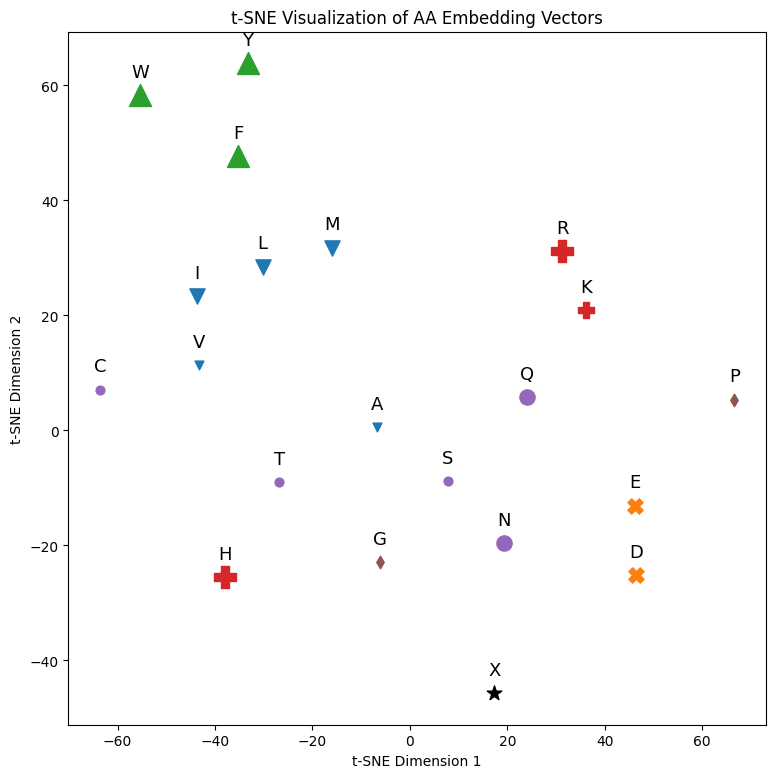

In [71]:
keys = prottrans_aas # To compare with prottrans embedding visualizations
#keys = list(aa_embeddings.keys())
vectors = np.array([aa_embeddings[key] for key in keys])

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=5,random_state=42)
tsne_result = tsne.fit_transform(vectors)


# Plot the t-SNE result with labels and colors according to the clusters
plt.figure(figsize=(9, 9))
for i, key in enumerate(keys):
    if aa_masses[key] < 130:
        marker_size = 40
    elif aa_masses[key] > 150:
        marker_size = 250
    else:
        marker_size = 120

    if key in  positive_charged_aas:
        marker = "P"
        color = "tab:red"      
    elif key in negative_charged_aas:
        marker = "X"
        color = "tab:orange"   
    elif key in  polar_neutral_aas:
        marker = "o"
        color = "tab:purple"
    elif key in hydrophobic_aromatic_aas:
        marker = "^"
        color = "tab:green"
    elif key in hydrophobic_aliphatic_aas:
        marker = "v"
        color = "tab:blue"
    elif key in unique_aas:
        marker = "d"
        color = "tab:brown"
    else:
        marker = "*"
        color = "k"
    plt.scatter(tsne_result[i, 0], tsne_result[i, 1], c=color,marker=marker, s=marker_size)

# Annotate each point with its corresponding key
for i, key in enumerate(keys):
    #amino_acid_symbol = amino_acid_symbols.get(key, key)
    plt.annotate(key, (tsne_result[i, 0], tsne_result[i, 1]),                 
                 xytext=(0, 10), fontsize = 13,
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.title('t-SNE Visualization of AA Embedding Vectors')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

### k-means

c:\Users\efeka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


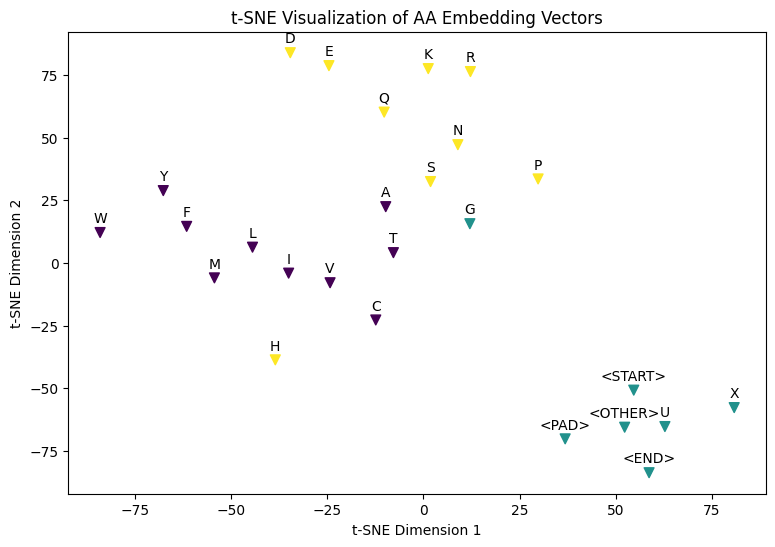

In [52]:
# Extract vectors and corresponding keys
keys = list(aa_embeddings.keys())
#keys = prottrans_aas
vectors = np.array([aa_embeddings[key] for key in keys])

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=5,random_state=42)
tsne_result = tsne.fit_transform(vectors)

# Apply k-means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_result = kmeans.fit_predict(vectors)

# Plot the t-SNE result with labels and colors according to the clusters
plt.figure(figsize=(9, 6))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans_result, marker="v" ,cmap='viridis', s=50)

# Annotate each point with its corresponding key
for i, key in enumerate(keys):
    #amino_acid_symbol = amino_acid_symbols.get(key, key)
    plt.annotate(key, (tsne_result[i, 0], tsne_result[i, 1]),                 
                 xytext=(0, 5), 
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.title('t-SNE Visualization of AA Embedding Vectors')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [14]:
vectors.shape

(26, 128)

### Spectral Clustering

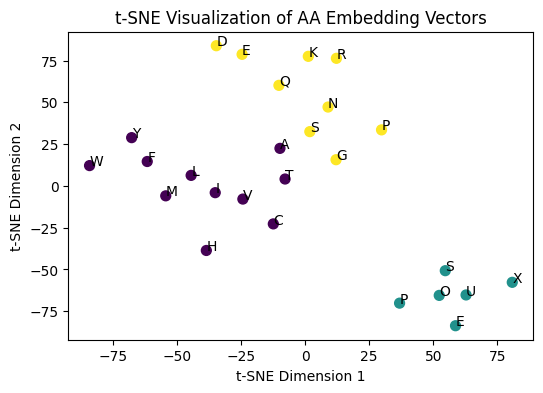

In [47]:
# Apply Spectral Clustering
n_clusters = 3
spectral_clustering = SpectralClustering(n_clusters=n_clusters, random_state=42)
cluster_labels = spectral_clustering.fit_predict(vectors)

# Plot the t-SNE result with labels and colors according to the clusters
plt.figure(figsize=(6, 4))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='viridis', s=50)


# Annotate each point with its corresponding key
for i, key in enumerate(keys):
    amino_acid_symbol = amino_acid_symbols.get(key, key)
    plt.annotate(amino_acid_symbol, (tsne_result[i, 0], tsne_result[i, 1]))

plt.title('t-SNE Visualization of AA Embedding Vectors')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

### Hierarchical Clustering & Dendogram

In [38]:
aa_symbols = []
for symbol in amino_acid_symbols.values():
    aa_symbols.append(symbol)

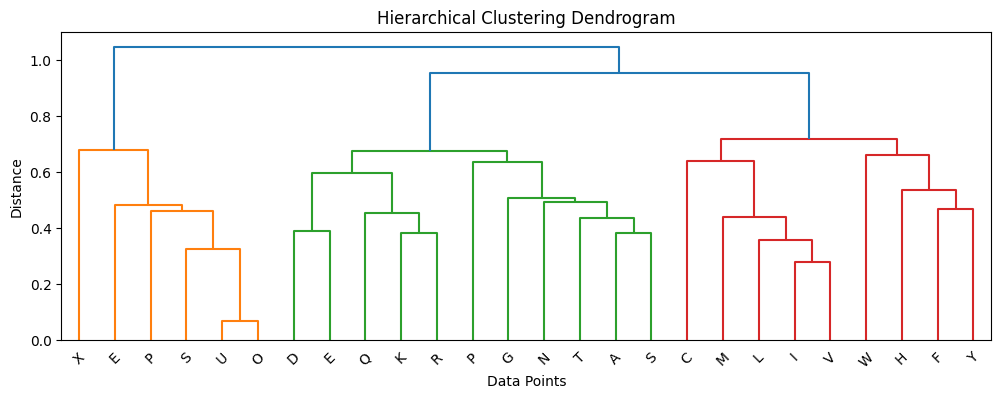

In [42]:
# Perform hierarchical clustering
linkage_matrix = linkage(vectors, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 4))
dendrogram(linkage_matrix, labels=aa_symbols)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
